# Objective : To predict the price of flight ticket.

In this task 2 dataset are given. One is training dataset and the other is testing dataset. So we need to train model on training dataset and then test it on testing dataset. By doing this we need to predict price of ticket of flight.

* Target feature is Price in the train dataset and there is no target feature in test dataset

#### Importing various libraries necessary for task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Data_Train.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test = pd.read_excel('Test_set.xlsx')

In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#### Now lets start work on training dataset by checking dimensions, description and pressence of null value in it.

In [6]:
train.shape

(10683, 11)

In [7]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

From above we conclude this about train dataset :

* dataset contains 10683 rows and 11 columns
* description of dataset gives mean, min value, max value, etc of every column of dataset which contains continuous data in it and the only column which contains continuous data in it is Price.
* there is pressence of null values in 2 columns in dataset.

#### EDA

1. Airline

In [9]:
train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

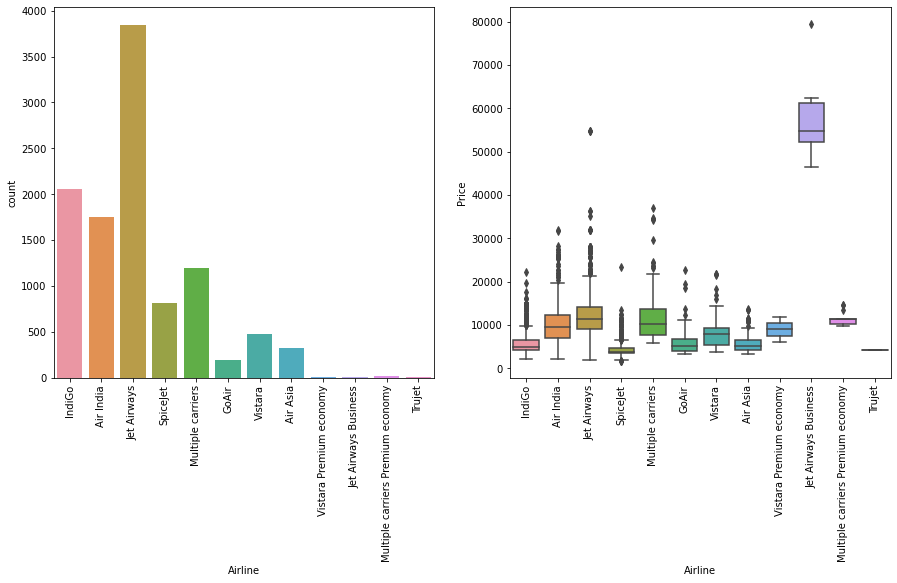

In [10]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Airline'])
plt.xlabel('Airline')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Airline', y= 'Price', data= train)
plt.xlabel('Airline')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

By looking at both graphs of Airline we conclude that most number of flights are of Jet Airways from countplot and from boxplot we conclude that outliers are present in Price of every category of Airline except one.

2. Date_of_Journey

In [11]:
train['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

We cannot use this information exactly to plot graphs and we cannot extract year from it as it is from only one year.

In [12]:
ab = []
for i in train['Date_of_Journey']:
    i = i[0]
    ab.append(i)

In [13]:
train['Date_of_Journey'] = pd.Series(ab)

In [14]:
train['Date_of_Journey'].unique()

array(['2', '1', '9', '0', '3', '6'], dtype=object)

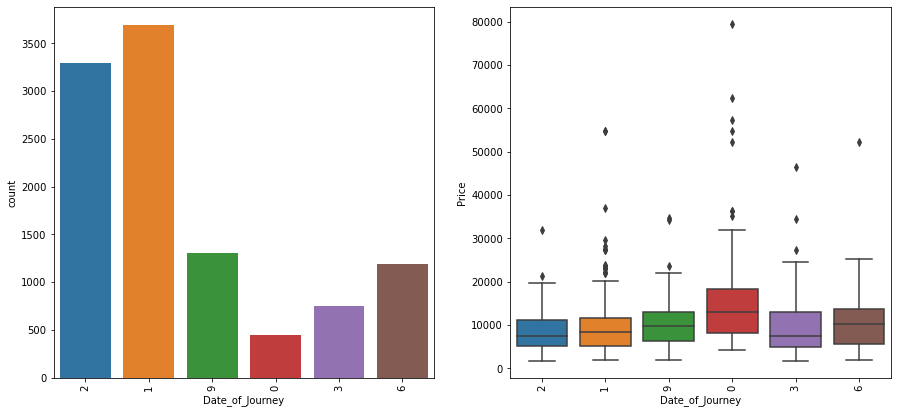

In [15]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Date_of_Journey'])
plt.xlabel('Date_of_Journey')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Date_of_Journey', y= 'Price', data= train)
plt.xlabel('Date_of_Journey')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

By looking at both graphs of Date_of_Journey we conclude that most of the journey are being held on dates that starts with 1 from countplot and from boxplot we conclude that outliers are present in Price of every category of Date_of_Journey.

3. Source

In [16]:
train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

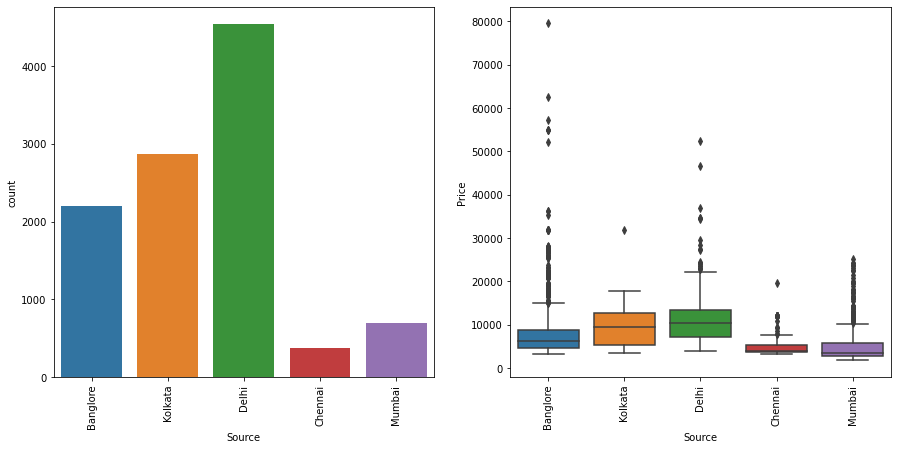

In [17]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Source'])
plt.xlabel('Source')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Source', y= 'Price', data= train)
plt.xlabel('Source')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

By looking at both graphs of Source we conclude that most number of flights took off from Delhi from countplot and from boxplot we conclude that outliers are present in Price of every category of Source.

4. Destination

In [18]:
train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

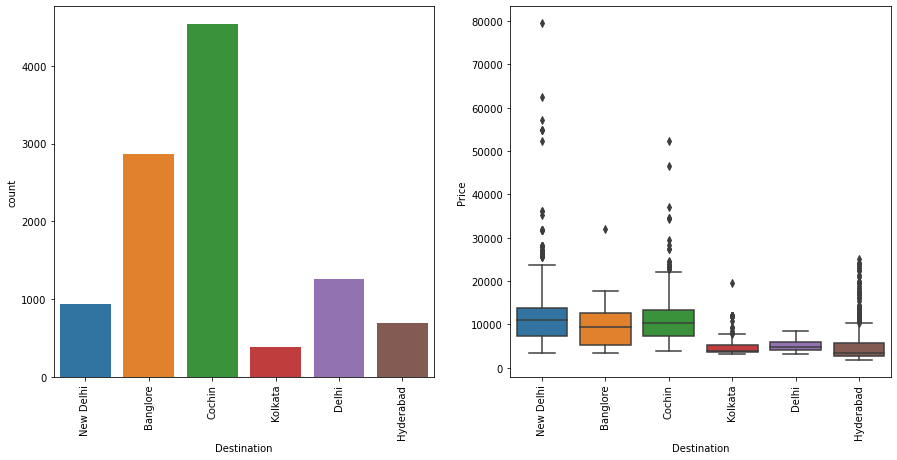

In [19]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Destination'])
plt.xlabel('Destination')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Destination', y= 'Price', data= train)
plt.xlabel('Destination')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

By looking at both graphs of Destination we conclude that most flights destination is decided as Cochin from countplot and from boxplot we conclude that outliers present in Price of every category of Destination.

5. Route

In [20]:
train['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

As there is pressence of null value in this column. So we need to fill it randomly to avoid data bias.

In [21]:
train['Route'] = train['Route'].fillna(method= 'bfill')

In [22]:
train['Route'].isnull().sum()

0

In [23]:
ab = []
for i in train['Route']:
    i = i[:3]
    ab.append(i)

In [25]:
train['Route'] = pd.Series(ab)

In [26]:
train['Route'].unique()

array(['BLR', 'CCU', 'DEL', 'MAA', 'BOM'], dtype=object)

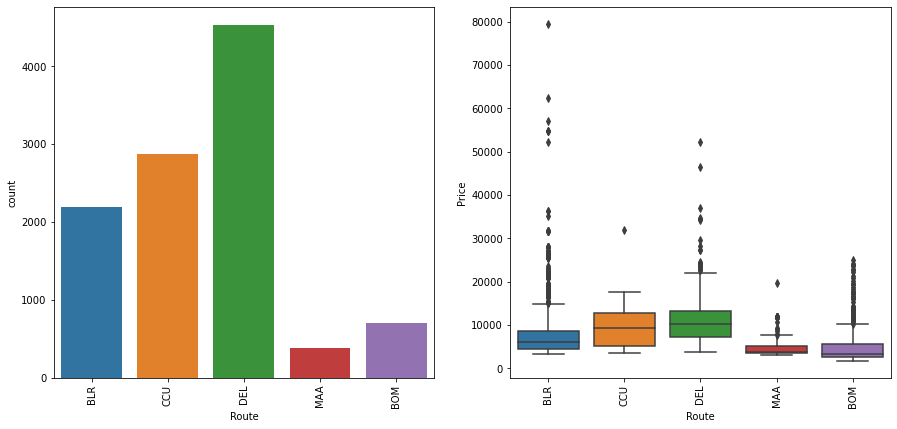

In [27]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Route'])
plt.xlabel('Route')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Route', y= 'Price', data= train)
plt.xlabel('Route')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

By looking at both graphs of Route we conclude that most flights begine their route from DEL from countplot and from boxplot we conclude that outliers re present in Price of every category of Route.

6. Dep_Time

In [28]:
train['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [29]:
ab = []
for i in train['Dep_Time']:
    i = i[:2]
    ab.append(i)

In [31]:
train['Dep_Time'] = pd.Series(ab)

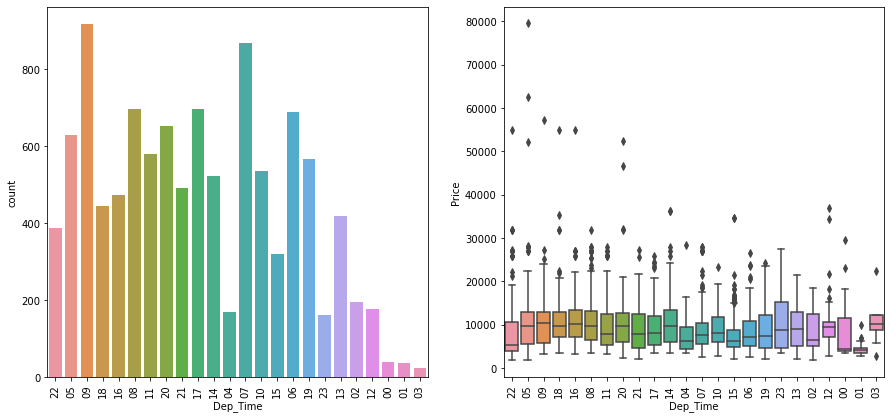

In [32]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Dep_Time'])
plt.xlabel('Dep_Time')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Dep_Time', y= 'Price', data= train)
plt.xlabel('Dep_Time')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

By looking at both graphs of Dep_Time we conclude that most of flight depart at 0900 hours from airports from countplot and from boxplot we conclude that outliers are present in Price of every category of Dep_Time

7. Arrival_Time

In [33]:
train['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [34]:
ab = []
for i in train['Arrival_Time']:
    i = i[:2]
    ab.append(i)

In [36]:
train['Arrival_Time'] = pd.Series(ab)

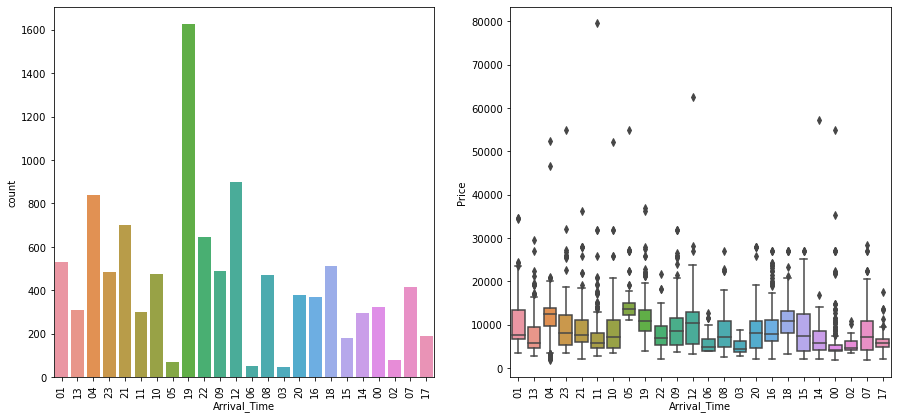

In [37]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Arrival_Time'])
plt.xlabel('Arrival_Time')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Arrival_Time', y= 'Price', data= train)
plt.xlabel('Arrival_Time')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

By looking at both flights of Arrival_Time we cocnlude that most flights arrival time are at 1900 hours from countplot and from boxplot we conclude that outliers are present in Price of every category of Arrival_time except one category.

8. Duration

In [38]:
train['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [41]:
ab = []
for i in train['Duration']:
    i = i[:3]
    ab.append(i)

In [43]:
train['Duration'] = pd.Series(ab)

In [44]:
train['Duration'].unique()

array(['2h ', '7h ', '19h', '5h ', '4h ', '15h', '21h', '25h', '13h',
       '12h', '26h', '22h', '23h', '20h', '10h', '6h ', '11h', '8h ',
       '16h', '3h ', '3h', '27h', '1h ', '5h', '14h', '9h ', '18h', '17h',
       '24h', '30h', '8h', '28h', '29h', '37h', '9h', '4h', '34h', '7h',
       '38h', '35h', '36h', '47h', '6h', '33h', '32h', '31h', '42h',
       '39h', '5m', '41h', '40h'], dtype=object)

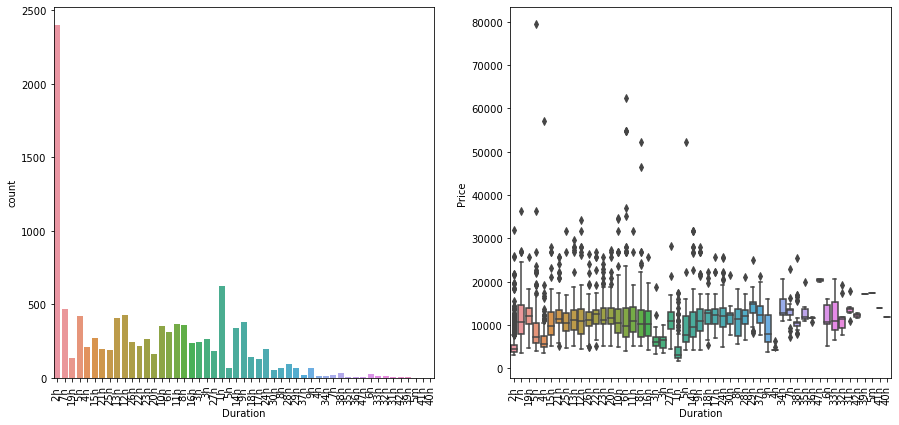

In [45]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Duration'])
plt.xlabel('Duration')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Duration', y= 'Price', data= train)
plt.xlabel('Duration')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

By looking at both graphs of Duration we conclude that most fights are of 2 hours duration from countplot and from boxplot we conclude that outliers are present in Price of every category of Duration except 5 categories.

9. Total_Stops

In [46]:
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

As their is null value present in column. So we need to fill it randomly to avoid data bias.

In [47]:
train['Total_Stops'] = train['Total_Stops'].fillna(method= 'bfill')

In [48]:
train['Total_Stops'].isnull().sum()

0

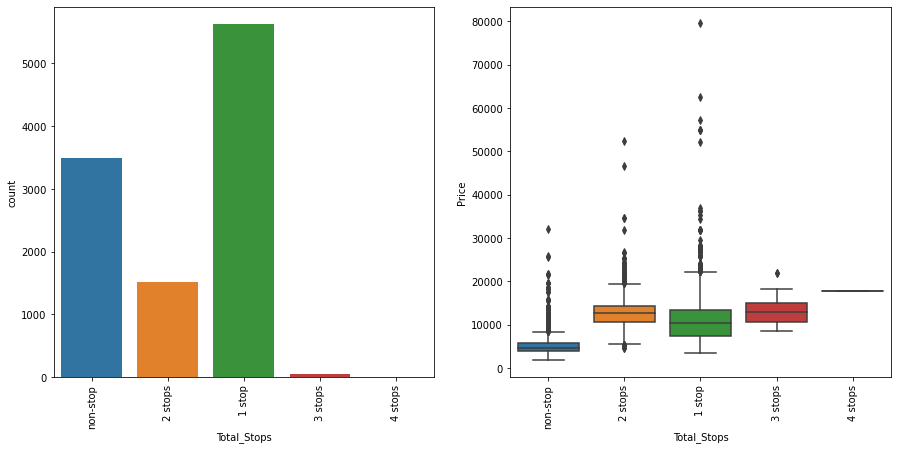

In [49]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Total_Stops'])
plt.xlabel('Total_Stops')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Total_Stops', y= 'Price', data= train)
plt.xlabel('Total_Stops')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

By looking at both graphs of Total_Stops we conclude that most flights occuring are with 1 stop from countplot and from boxplot we conclude that outliers are present in Price of every category of Total_Stops except one category.

10. Additional_Info

In [50]:
train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

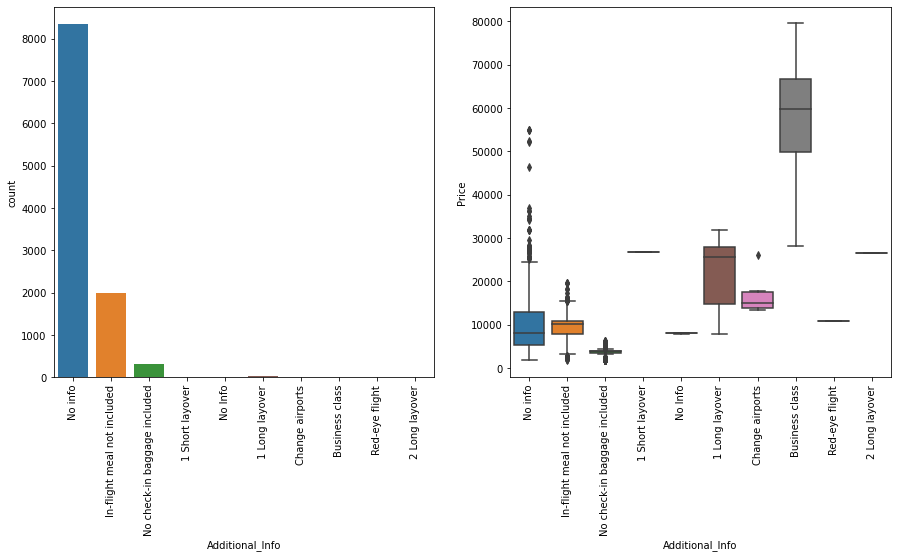

In [51]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Additional_Info'])
plt.xlabel('Additional_Info')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Additional_Info', y= 'Price', data= train)
plt.xlabel('Additional_Info')
plt.xticks(rotation= 90)
plt.ylabel('Price')
plt.show()

By lloking at both graphs of Additional_Info we conclude that most flights present with No Info category Additional_Info from countplot and from boxplot we conclude that outliers are present in price of 4 categories of Additional_Info out of total 10 categories.

#### Now lets change data type of every column to int or float data type.

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [54]:
len(train['Airline'].unique())

12

In [55]:
train['Airline'] = train['Airline'].replace(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
                                             'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
                                             'Vistara Premium economy', 'Jet Airways Business',
                                             'Multiple carriers Premium economy', 'Trujet'], np.arange(0,12))

In [56]:
train['Date_of_Journey'].unique()

array(['2', '1', '9', '0', '3', '6'], dtype=object)

In [57]:
train['Date_of_Journey'] = pd.to_numeric(train['Date_of_Journey'])

In [59]:
train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [60]:
train['Source'] = train['Source'].replace(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], np.arange(0,5))

In [61]:
train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [62]:
train['Destination'] = train['Destination'].replace(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
                                                   np.arange(0,6))

In [63]:
train['Route'].unique()

array(['BLR', 'CCU', 'DEL', 'MAA', 'BOM'], dtype=object)

In [64]:
train['Route'] = train['Route'].replace(['BLR', 'CCU', 'DEL', 'MAA', 'BOM'], np.arange(0,5))

In [65]:
train['Dep_Time'].unique()

array(['22', '05', '09', '18', '16', '08', '11', '20', '21', '17', '14',
       '04', '07', '10', '15', '06', '19', '23', '13', '02', '12', '00',
       '01', '03'], dtype=object)

In [66]:
train['Dep_Time'] = pd.to_numeric(train['Dep_Time'])

In [67]:
train['Arrival_Time'].unique()

array(['01', '13', '04', '23', '21', '11', '10', '05', '19', '22', '09',
       '12', '06', '08', '03', '20', '16', '18', '15', '14', '00', '02',
       '07', '17'], dtype=object)

In [68]:
train['Arrival_Time'] = pd.to_numeric(train['Arrival_Time'])

In [69]:
train['Duration'].unique()

array(['2h ', '7h ', '19h', '5h ', '4h ', '15h', '21h', '25h', '13h',
       '12h', '26h', '22h', '23h', '20h', '10h', '6h ', '11h', '8h ',
       '16h', '3h ', '3h', '27h', '1h ', '5h', '14h', '9h ', '18h', '17h',
       '24h', '30h', '8h', '28h', '29h', '37h', '9h', '4h', '34h', '7h',
       '38h', '35h', '36h', '47h', '6h', '33h', '32h', '31h', '42h',
       '39h', '5m', '41h', '40h'], dtype=object)

In [70]:
train['Duration'] = train['Duration'].replace(['2h ', '7h ', '19h', '5h ', '4h ', '15h', '21h', '25h', '13h',
                                               '12h', '26h', '22h', '23h', '20h', '10h', '6h ', '11h', '8h ',
                                               '16h', '3h ', '3h', '27h', '1h ', '5h', '14h', '9h ', '18h', '17h',
                                               '24h', '30h', '8h', '28h', '29h', '37h', '9h', '4h', '34h', '7h',
                                               '38h', '35h', '36h', '47h', '6h', '33h', '32h', '31h', '42h',
                                               '39h', '5m', '41h', '40h'],[ 2, 7, 19, 5, 4, 15, 21, 25, 13,
                                                                            12, 26, 22, 23, 20, 10, 6, 11, 8,
                                                                            16, 3, 3, 27, 1, 5, 14, 9, 18, 17,
                                                                            24, 30, 8, 28, 29, 37, 9, 4, 34, 7,
                                                                            38, 35, 36, 47, 6, 33, 32, 31, 42,
                                                                            39, 5, 41, 40] )

In [71]:
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [72]:
train['Total_Stops'] = train['Total_Stops'].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'], np.arange(0,5))

In [75]:
train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [76]:
train['Additional_Info'] = train['Additional_Info'].replace(['No info', 'In-flight meal not included',
                                                             'No check-in baggage included', '1 Short layover', 'No Info',
                                                             '1 Long layover', 'Change airports', 'Business class',
                                                             'Red-eye flight', '2 Long layover'], np.arange(0,10))

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Date_of_Journey  10683 non-null  int64
 2   Source           10683 non-null  int32
 3   Destination      10683 non-null  int32
 4   Route            10683 non-null  int32
 5   Dep_Time         10683 non-null  int64
 6   Arrival_Time     10683 non-null  int64
 7   Duration         10683 non-null  int64
 8   Total_Stops      10683 non-null  int32
 9   Additional_Info  10683 non-null  int32
 10  Price            10683 non-null  int64
dtypes: int32(6), int64(5)
memory usage: 667.8 KB


#### Now plotting heatmap to check correlation

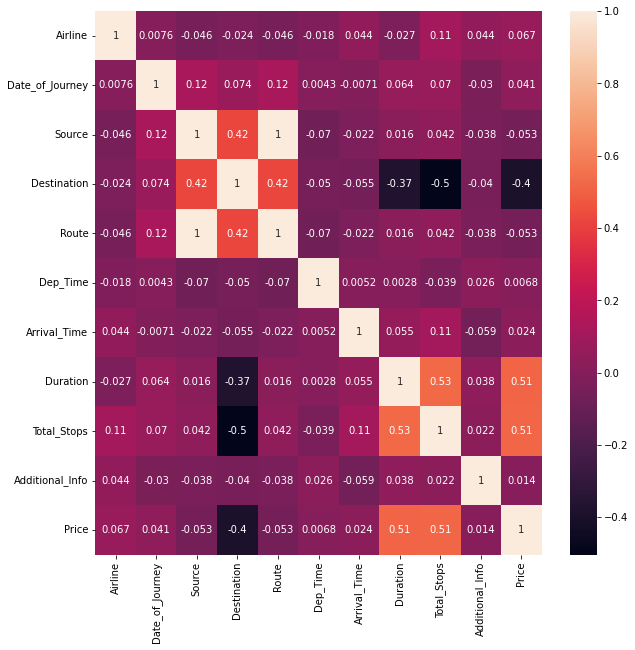

In [78]:
plt.figure(figsize= [10,10])
sns.heatmap(train.corr(), annot= True)
plt.show()

By looking at heatmap we can conclude that target column (Price) is having high positive correlation with Duration and Total_Stops. Also it is having high negative correlation with Destination. Also we can drop Source and route column to remove multicollinearity and make data more refine.

In [80]:
train.drop(['Source', 'Route'], axis= 1, inplace= True)

#### Now lets check various model on training dataset to find the best suited model to make it work test dataset

1. Linear Regression model

In [81]:
X_train = train.drop(['Price'], axis= 1)
y_train = train['Price']

In [82]:
scaler = StandardScaler()
scaledX_train = scaler.fit_transform(X_train)

In [83]:
lr = LinearRegression()
lrf = GridSearchCV(lr, param_grid= {'n_jobs': [1,2,3,4,5]}, scoring= 'r2', cv= 5)
lrf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5]}, scoring='r2')

In [84]:
lrf.best_params_

{'n_jobs': 1}

In [85]:
lrf.score(scaledX_train, y_train)

0.3598861639206502

2. Decision Tree Regression model

In [86]:
dt = DecisionTreeRegressor()
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)
dtf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [87]:
dtf.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [88]:
dtf.score(scaledX_train, y_train)

0.616907055290982

3. Random Forest Regression Model

In [90]:
rf = RandomForestRegressor()
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)
rff.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [91]:
rff.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [92]:
rff.score(scaledX_train, y_train)

0.6437268096853623

4. Bagging Regression Model

In [94]:
br = BaggingRegressor(base_estimator= DecisionTreeRegressor())
brf = GridSearchCV(br, param_grid= {'n_estimators': [10,20,30,40,50], 'max_samples': [1,2,3,4,5], 'max_features': [1,2,3,4,5]},
                  scoring= 'r2', cv= 5)
brf.fit(scaledX_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='r2')

In [95]:
brf.best_params_

{'max_features': 3, 'max_samples': 5, 'n_estimators': 20}

In [96]:
brf.score(scaledX_train, y_train)

0.25636970324866515

5. Supprt Vector Regression Model

In [97]:
sv = SVR()
svf = GridSearchCV(sv, param_grid= {'kernel': ['rbf', 'linear'], 'C': [1,2,3,4,5]}, scoring= 'r2', cv= 5)
svf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ['rbf', 'linear']},
             scoring='r2')

In [98]:
svf.best_params_

{'C': 4, 'kernel': 'linear'}

In [99]:
svf.score(scaledX_train, y_train)

0.3277794283626837

#### By looking at performances of all models we can conclude that best suited model for the dataset is Random Forest Regression model. Now we need to prepare test dataset to make prediction.

In [100]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [102]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

#### Now we need to drop those columns that we dropped in train dataset

In [103]:
test.drop(['Source', 'Route'], axis= 1, inplace= True)

#### Now we need to change data types of every column to int or float data type of dataset.

In [106]:
test['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [107]:
test['Airline'] = test['Airline'].replace(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
                                           'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
                                           'GoAir', 'Multiple carriers Premium economy',
                                           'Jet Airways Business'], np.arange(0,11))

In [108]:
test['Date_of_Journey'].unique()

array(['6/06/2019', '12/05/2019', '21/05/2019', '24/06/2019',
       '12/06/2019', '12/03/2019', '1/05/2019', '15/03/2019',
       '18/05/2019', '21/03/2019', '15/06/2019', '15/05/2019',
       '3/06/2019', '06/03/2019', '24/03/2019', '6/03/2019', '9/05/2019',
       '18/03/2019', '6/04/2019', '1/06/2019', '3/03/2019', '27/03/2019',
       '9/06/2019', '3/05/2019', '1/04/2019', '18/06/2019', '15/04/2019',
       '6/05/2019', '9/03/2019', '3/04/2019', '27/06/2019', '21/06/2019',
       '21/04/2019', '18/04/2019', '9/04/2019', '24/05/2019',
       '01/03/2019', '09/03/2019', '27/05/2019', '03/03/2019',
       '27/04/2019', '1/03/2019', '24/04/2019', '12/04/2019'],
      dtype=object)

In [109]:
ab = []
for i in test['Date_of_Journey']:
    i = i[0]
    ab.append(i)

In [111]:
test['Date_of_Journey'] = pd.Series(ab)

In [112]:
test['Date_of_Journey'] = pd.to_numeric(test['Date_of_Journey'])

In [113]:
test['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [114]:
test['Destination'] = test['Destination'].replace(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
                                                   np.arange(0,6))

In [115]:
test['Dep_Time'].unique()

array(['17:30', '06:20', '19:15', '08:00', '23:55', '18:15', '07:30',
       '15:15', '10:10', '16:30', '13:55', '06:50', '09:00', '05:45',
       '21:25', '13:15', '09:55', '22:55', '10:45', '20:00', '05:30',
       '21:05', '16:00', '14:00', '22:50', '19:50', '07:10', '05:55',
       '16:55', '18:55', '10:20', '17:10', '13:00', '22:45', '21:00',
       '17:45', '09:25', '14:05', '09:45', '02:00', '11:40', '17:00',
       '06:00', '07:05', '16:45', '19:40', '03:50', '21:15', '11:30',
       '12:00', '21:50', '05:50', '07:55', '09:10', '08:20', '09:30',
       '10:00', '14:55', '22:10', '07:00', '19:55', '19:30', '15:00',
       '05:35', '06:40', '17:15', '21:20', '07:35', '06:55', '17:35',
       '11:15', '20:15', '20:25', '05:40', '15:05', '20:55', '14:25',
       '19:45', '08:25', '22:00', '21:10', '02:15', '08:30', '20:40',
       '14:15', '14:35', '11:10', '19:35', '15:20', '06:10', '22:20',
       '08:35', '14:40', '09:40', '01:30', '08:50', '19:05', '08:55',
       '11:35', '04:

In [116]:
ab = []
for i in test['Dep_Time']:
    i = i[:2]
    ab.append(i)

In [118]:
test['Dep_Time'] = pd.Series(ab)

In [119]:
test['Dep_Time'] = pd.to_numeric(test['Dep_Time'])

In [120]:
test['Arrival_Time'].unique()

array(['04:25 07 Jun', '10:20', '19:00 22 May', '21:00', '02:45 25 Jun',
       '12:35 13 Jun', '22:35', '20:30', '12:55', '18:50 22 Mar', '16:10',
       '19:15', '10:25', '12:35 04 Jun', '08:15 07 Mar', '22:30', '22:10',
       '04:25 13 Jun', '08:15 13 Mar', '01:35 07 Mar', '10:05 10 May',
       '09:00 16 Mar', '19:00', '23:55', '04:25 22 Mar', '17:45',
       '01:20 04 Mar', '01:35 28 Mar', '12:35', '22:50', '08:35', '23:00',
       '12:00 10 May', '19:40', '01:30 16 May', '00:15 10 Jun',
       '07:40 16 Jun', '02:15 02 May', '20:05', '18:50 04 Mar', '15:25',
       '22:35 02 Apr', '13:45 13 May', '19:50', '16:20 25 Mar', '11:25',
       '12:00', '18:10', '07:45', '19:10', '12:10', '18:50 07 May',
       '09:25 10 Mar', '22:25', '22:20', '15:50', '07:25', '00:15 13 Jun',
       '18:50', '13:30', '19:00 19 May', '21:50', '15:45', '10:40',
       '11:20', '12:20', '05:25 02 May', '17:50', '10:05 19 May',
       '01:00 25 Jun', '09:05 10 Jun', '01:30 10 May', '10:35',
       '08:15 

In [121]:
ab = []
for i in test['Arrival_Time']:
    i = i[:2]
    ab.append(i)

In [123]:
test['Arrival_Time'] = pd.Series(ab)

In [124]:
test['Arrival_Time'] = pd.to_numeric(test['Arrival_Time'])

In [125]:
test['Duration'].unique()

array(['10h 55m', '4h', '23h 45m', '13h', '2h 50m', '18h 20m', '15h 5m',
       '5h 15m', '2h 45m', '6h 5m', '28h 55m', '9h 20m', '10h 15m',
       '4h 40m', '17h 20m', '10h 50m', '9h 15m', '12h 15m', '9h 10m',
       '14h 50m', '14h 5m', '11h 35m', '13h 30m', '12h 25m', '2h 30m',
       '25h 30m', '19h 25m', '7h', '11h 40m', '7h 5m', '3h', '1h 25m',
       '2h 40m', '17h 5m', '10h 40m', '12h 30m', '1h 30m', '23h 40m',
       '2h 20m', '23h 35m', '27h 40m', '28h 20m', '5h 45m', '26h 25m',
       '5h 40m', '2h 15m', '2h 55m', '7h 30m', '5h 20m', '25h 50m',
       '13h 15m', '26h 20m', '5h 25m', '8h 45m', '7h 20m', '21h 10m',
       '16h', '7h 50m', '16h 5m', '5h 55m', '13h 50m', '11h 55m',
       '13h 20m', '18h 10m', '28h 10m', '5h', '23h 15m', '1h 15m',
       '1h 20m', '13h 25m', '6h 15m', '10h 10m', '4h 35m', '11h',
       '12h 20m', '15h 10m', '19h', '13h 45m', '9h 50m', '2h 35m',
       '7h 15m', '23h', '10h 25m', '5h 5m', '22h 45m', '8h 40m',
       '11h 30m', '15h 40m', '7h 55m'

In [127]:
ab = []
for i in test['Duration']:
    i = i[:3]
    ab.append(i)

In [129]:
test['Duration'] = pd.Series(ab)

In [130]:
test['Duration'].unique()

array(['10h', '4h', '23h', '13h', '2h ', '18h', '15h', '5h ', '6h ',
       '28h', '9h ', '4h ', '17h', '12h', '14h', '11h', '25h', '19h',
       '7h', '7h ', '3h', '1h ', '27h', '26h', '8h ', '21h', '16h', '5h',
       '22h', '33h', '8h', '24h', '38h', '3h ', '6h', '20h', '9h', '35h',
       '31h', '34h', '29h', '30h', '37h', '36h', '39h', '32h', '40h',
       '5m'], dtype=object)

In [131]:
test['Duration'] = test['Duration'].replace(['10h', '4h', '23h', '13h', '2h ', '18h', '15h', '5h ', '6h ',
                                             '28h', '9h ', '4h ', '17h', '12h', '14h', '11h', '25h', '19h',
                                             '7h', '7h ', '3h', '1h ', '27h', '26h', '8h ', '21h', '16h', '5h',
                                             '22h', '33h', '8h', '24h', '38h', '3h ', '6h', '20h', '9h', '35h',
                                             '31h', '34h', '29h', '30h', '37h', '36h', '39h', '32h', '40h', '5m'],
                                             [ 10, 4, 23, 13, 2, 18, 15, 5, 6,
                                               28, 9, 4, 17, 12, 14, 11, 25, 19,
                                               7, 7, 3, 1, 27, 26, 8, 21, 16, 5,
                                               22, 33, 8, 24, 38, 3, 6, 20, 9, 35,
                                               31, 34, 29, 30, 37, 36, 39, 32, 40, 5])

In [132]:
test['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [133]:
test['Total_Stops'] = test['Total_Stops'].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'], np.arange(0,5))

In [134]:
test['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [135]:
test['Additional_Info'] = test['Additional_Info'].replace(['No info', 'In-flight meal not included',
                                                           'No check-in baggage included', '1 Long layover', 'Business class',
                                                           'Change airports'], np.arange(0,6))

#### Now lets scaled test dataset to remove any outliers present in it.

In [136]:
scaledX_test = scaler.transform(test)

#### Now lets make prediction using Random Forest Regression Model

In [137]:
rf = RandomForestRegressor(max_depth= 5, min_samples_leaf= 1, min_samples_split= 3)

In [138]:
pred = rf.fit(scaledX_train, y_train).predict(scaledX_test)

In [140]:
prediction = pd.DataFrame({'Prediction Price': np.round(pred, 0)})
prediction

,Prediction Price
0,8678.0
1,6417.0
2,6643.0
3,11749.0
4,4758.0
...,...
2666,11353.0
2667,4955.0
2668,8603.0
2669,11353.0


#### we can check performance of the model using trainin dataset.

In [141]:
rf.score(scaledX_train, y_train)

0.6428305431364427

#### Hence model is giving quite good score for training dataset. So I can only hope that it is also giving good performance for testing dataset as there is no way that we can check it as no actual values were provided. Now lets save the model.

In [142]:
save_rf = pickle.dumps(rf)

#### Hence we have made the prediction using the best suited model and also saved it. So we have achieved our objective in the task.